<a href="https://colab.research.google.com/github/Victor-KKKK/AI_study/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install torch

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets


In [4]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100, 1))


In [5]:
def scatter_plot():
  plt.scatter(X[y == 0, 0], X[y == 0, 1])
  plt.scatter(X[y == 1, 0], X[y == 1, 1])

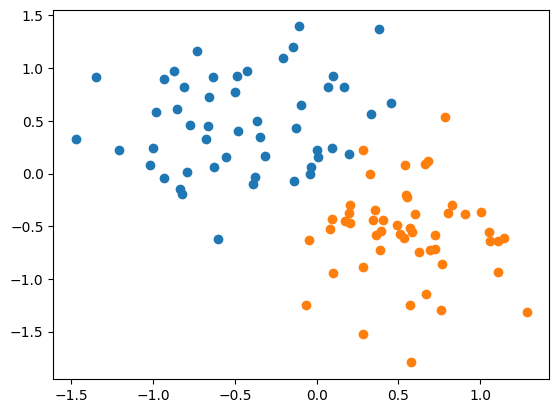

In [6]:
scatter_plot()

In [26]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    pred = torch.sigmoid(self.linear(x))
    return pred
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[w, b] = model.parameters()
w1, w2 = w.view(2)

def get_params():
  return(w1.item(), w2.item(), b[0].item())


[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


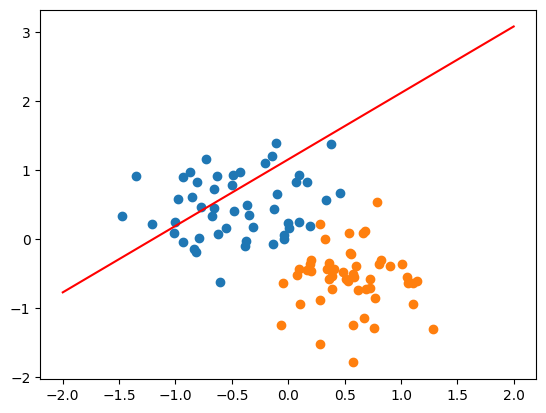

In [27]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2, 2])
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

plot_fit('Initial Model')


In [29]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [30]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss 0.6185115575790405
epoch: 1 loss 0.617464005947113
epoch: 2 loss 0.6164200305938721
epoch: 3 loss 0.6153795123100281
epoch: 4 loss 0.6143423318862915
epoch: 5 loss 0.6133086681365967
epoch: 6 loss 0.612278401851654
epoch: 7 loss 0.6112515330314636
epoch: 8 loss 0.6102280020713806
epoch: 9 loss 0.6092078685760498
epoch: 10 loss 0.6081911325454712
epoch: 11 loss 0.607177734375
epoch: 12 loss 0.6061676740646362
epoch: 13 loss 0.6051609516143799
epoch: 14 loss 0.6041575074195862
epoch: 15 loss 0.6031573414802551
epoch: 16 loss 0.6021605730056763
epoch: 17 loss 0.6011670231819153
epoch: 18 loss 0.6001767516136169
epoch: 19 loss 0.5991896986961365
epoch: 20 loss 0.5982059240341187
epoch: 21 loss 0.5972253680229187
epoch: 22 loss 0.5962480306625366
epoch: 23 loss 0.5952739119529724
epoch: 24 loss 0.5943029522895813
epoch: 25 loss 0.5933352112770081
epoch: 26 loss 0.5923705697059631
epoch: 27 loss 0.5914091467857361
epoch: 28 loss 0.5904508233070374
epoch: 29 loss 0.5894956588745

Text(0.5, 0, 'Epoch')

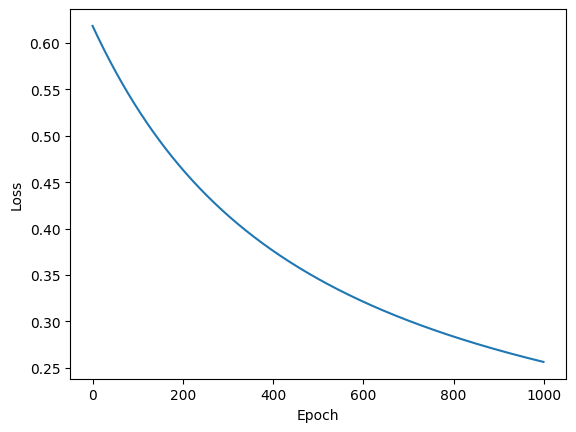

In [31]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

Blk point positive probability = 0.94242
Blk point's class is  1
Red point positive probability = 0.05055
Red point's class is  0


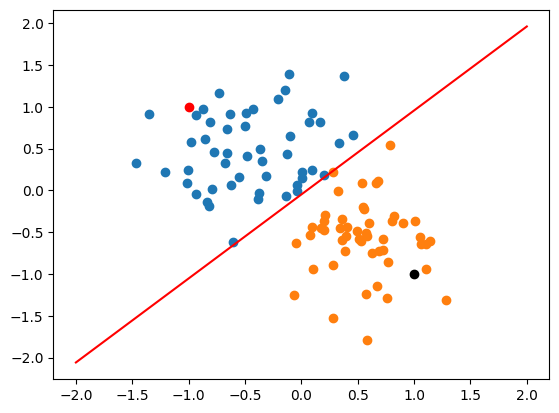

In [35]:
p1 = torch.Tensor([1.0, -1.0])
p2 = torch.Tensor([-1.0, 1.0])

plt.plot(p1.numpy()[0], p1.numpy()[1], 'ko')
plt.plot(p2.numpy()[0], p2.numpy()[1], 'ro')
op1 = model.forward(p1)
op2 = model.forward(p2)
print("Blk point positive probability = {:.5f}".format( op1.item()))
print("Blk point's class is ", model.predict(p1))
print("Red point positive probability = {:.5f}".format( op2.item()))
print("Red point's class is ", model.predict(p2))

plot_fit('Trained Model')